In [1]:
import numpy as np
import sys


sys.path.append('../..')
import DCTR


2024-08-16 17:29:38.726107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-16 17:29:38.726149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [6]:
data_dir = '../../../Data'

X0_old = np.load(f'{data_dir}/POWHEG_hvq/dileptonic/converted_lhe_hvq_dileptonic.npy')[:10000]

X1_old = np.load(f'{data_dir}/MiNNLO/showered/converted_lhe_MiNNLO_1.npy')

X0 = np.load('./converted_lhe_hvq_dileptonic_1M_1_HadronLevel-Off_MPI-Off_FSR-Off.npy')

X1 = np.load('./converted_lhe_MiNNLO_10K_1_HadronLevel-Off_MPI-Off_FSR-Off.npy')

print(X0_old.shape)
print(X1_old.shape)

print(X0.shape)
print(X1.shape)


(10000, 3, 9)
(10000, 3, 9)
(10000, 3, 9)
(10000, 3, 9)


In [12]:
# mid

data_dir = '../../../Data'

X0_mid = np.load(f'{data_dir}/POWHEG_hvq/dileptonic/converted_lhe_hvq_dileptonic_1M_1.npy')[:10000]

X1_mid = np.load(f'{data_dir}/MiNNLO/showered/converted_lhe_MiNNLO_10K_1.npy')[:10000]


print(X0_mid.shape)
print(X1_mid.shape)



(10000, 3, 9)
(10000, 3, 9)


In [9]:
dummy_wgt = np.array([1.0]*len(X0))


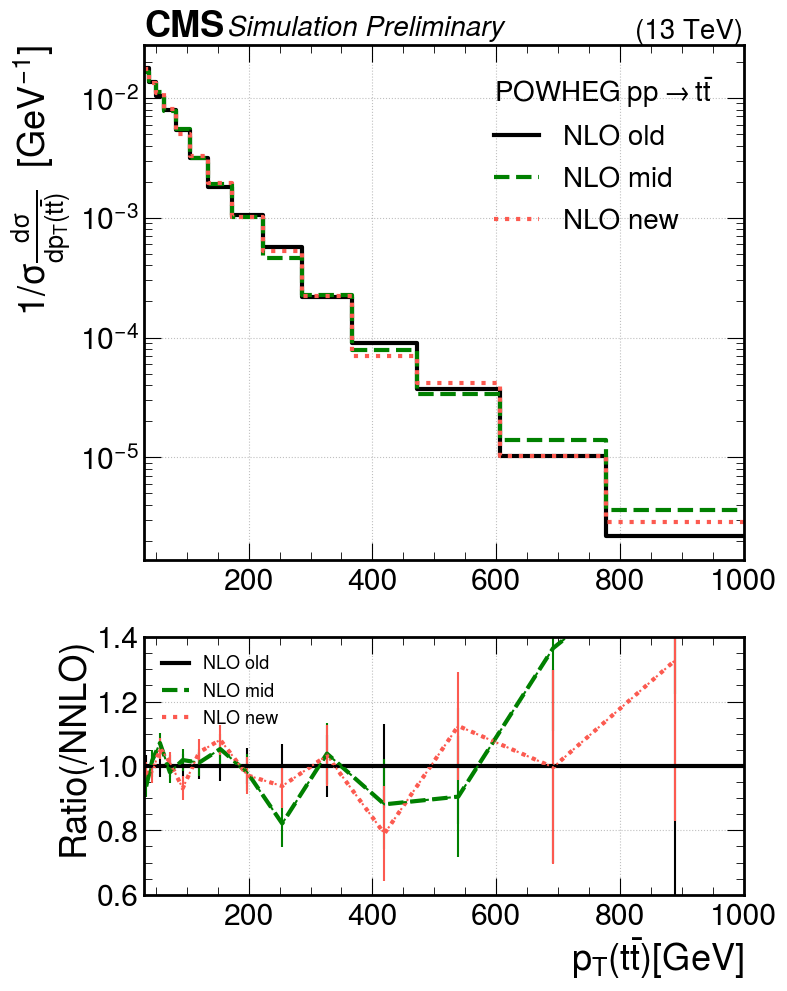

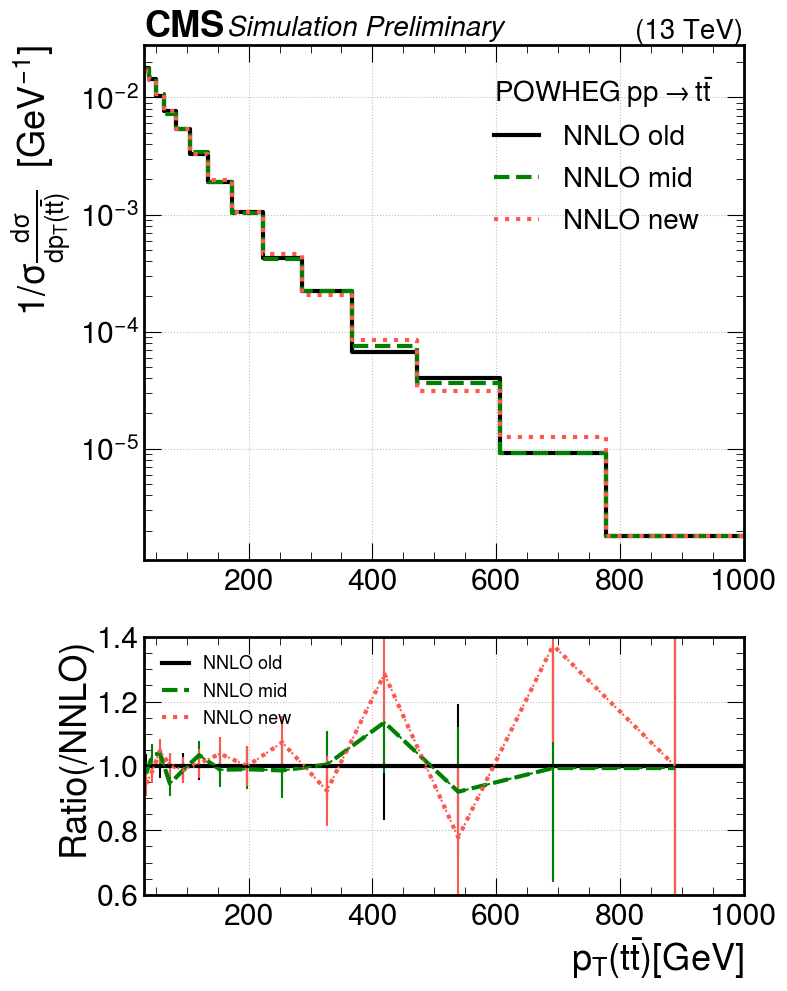

In [15]:
# Did these settings fix it?
# HadronLevel:all=off | MPI=off | FSR=off

# hvq
args = [(X0_old, dummy_wgt, 'NLO old'),
        (X0_mid, dummy_wgt, 'NLO mid'),
        (X0, dummy_wgt, 'NLO new')]

log_bins = np.logspace(np.log10(30), np.log10(1000), 15)


DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.6, 1.4])


# MiNNLO
args = [(X1_old, dummy_wgt, 'NNLO old'),
        (X1_mid, dummy_wgt, 'NNLO mid'),
        (X1, dummy_wgt, 'NNLO new')]



DCTR.plot_ratio_cms(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.6, 1.4])



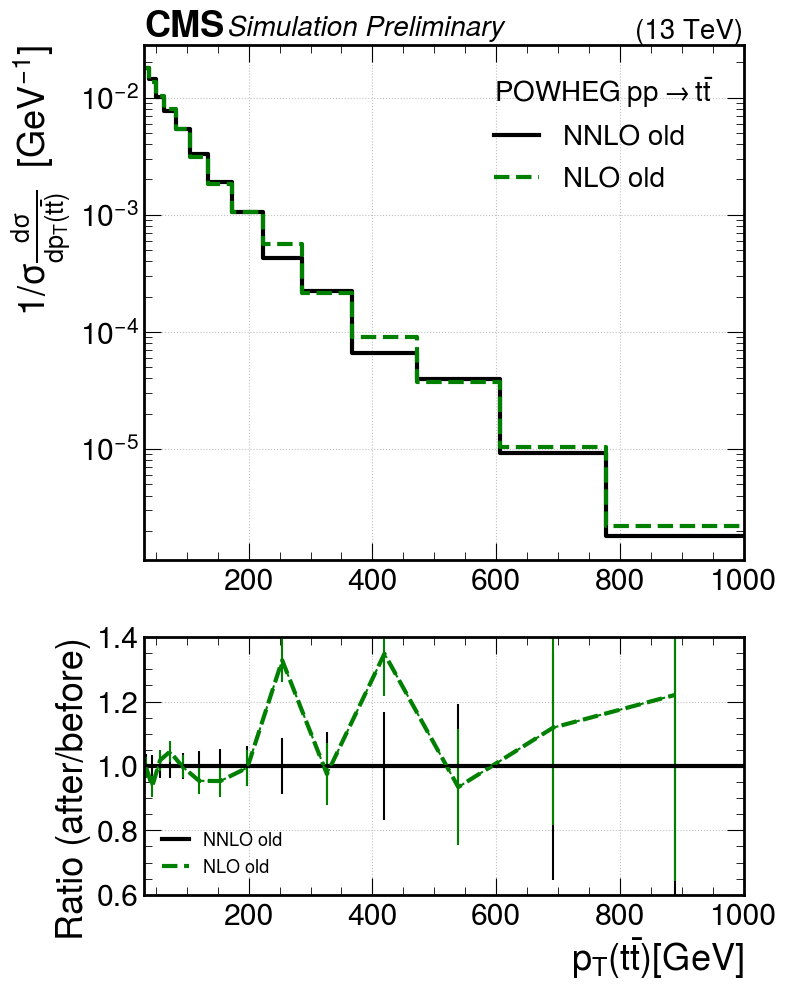

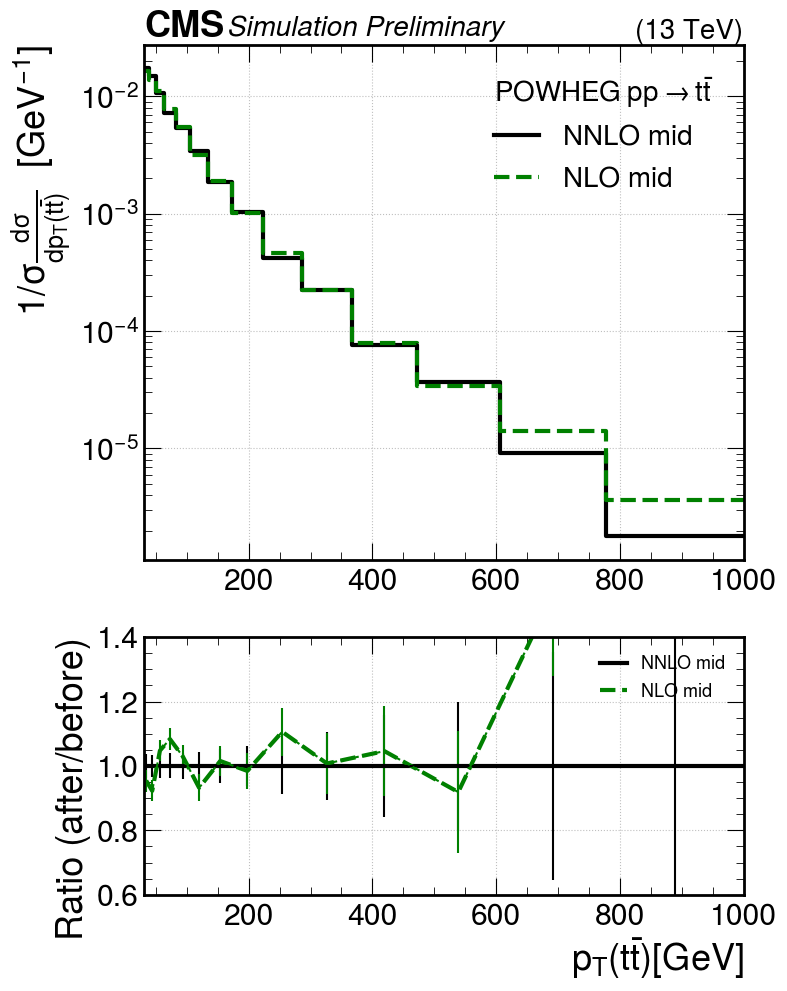

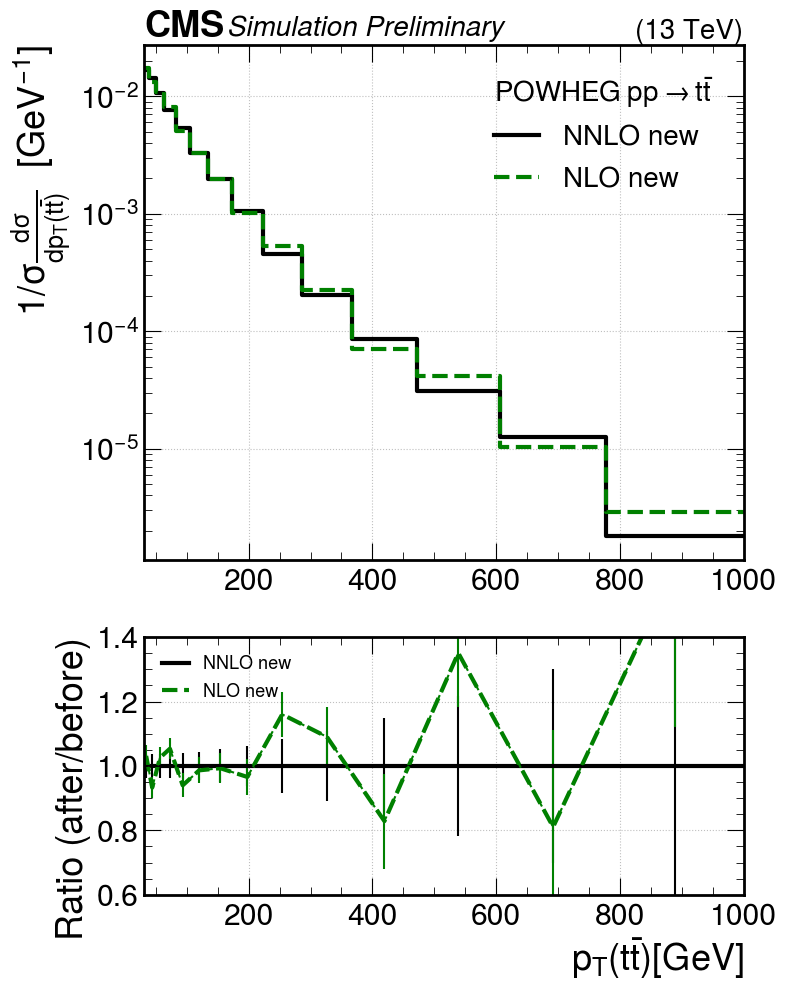

In [17]:
# Did these settings fix it?
# HadronLevel:all=off | MPI=off | FSR=off

# old 
args = [(X1_old, dummy_wgt, 'NNLO old'),
        (X0_old, dummy_wgt, 'NLO old')]

log_bins = np.logspace(np.log10(30), np.log10(1000), 15)


DCTR.plot_ratio_cms_2(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.6, 1.4])

# mid
args = [(X1_mid, dummy_wgt, 'NNLO mid'),
        (X0_mid, dummy_wgt, 'NLO mid')]


DCTR.plot_ratio_cms_2(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.6, 1.4])


# new
args = [(X1, dummy_wgt, 'NNLO new'),
        (X0, dummy_wgt, 'NLO new')]


DCTR.plot_ratio_cms_2(args, bins = log_bins, y_scale = 'log', ratio_ylim=[0.6, 1.4])


